In [1]:
import pandas as pd
import numpy as np          
import matplotlib.pyplot as plt
import yfinance as yf


In [11]:
df = pd.read_csv(r'C:\Users\henry\Downloads\spy_levels.csv.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
levels = df[["Call Resistance 0DTE", "Put Support 0DTE"]]
levels.columns = ["resistance", "support"]

spy = yf.download("SPY", start=levels.index.min(), end=levels.index.max()).Close
levels = levels.copy()
levels.loc[:, "spy"] = spy
levels[["resistance", "support"]] = levels[["resistance", "support"]].shift()
levels.dropna(inplace=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [12]:
strategy = levels.copy()
strategy["position"] = 0

strategy.loc[strategy.spy >= strategy.resistance, 'position'] = -1
strategy.loc[strategy.spy <= strategy.support, 'position'] = 1

strategy.position = (
    strategy
    .position
    .replace(0, np.nan)
    .ffill()
    .fillna(0)
)

strategy["spy_returns"] = strategy.spy.pct_change()
strategy["strategy_returns"] =  strategy.spy_returns * strategy.position.shift(1)

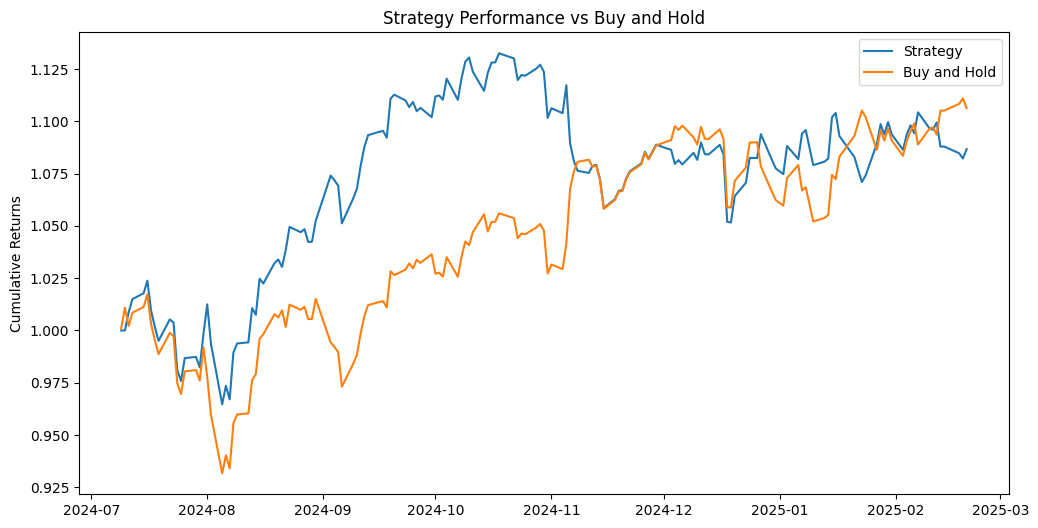

In [13]:
strategy['cumulative_returns'] = (1 + strategy.strategy_returns).cumprod()
np.sqrt(252) * strategy.strategy_returns.mean() / strategy.strategy_returns.std()

plt.figure(figsize=(12, 6))
plt.plot(strategy.cumulative_returns, label='Strategy')
plt.plot((1 + strategy.spy_returns).cumprod(), label='Buy and Hold')
plt.legend()
plt.title('Strategy Performance vs Buy and Hold')
plt.ylabel('Cumulative Returns')
plt.show()

In [14]:
df

,Call Resistance,Put Support,HVL,1D Min,1D Max,Call Resistance 0DTE,Put Support 0DTE,HVL 0DTE,Gamma Wall 0DTE,GEX 1,GEX 2,GEX 3,GEX 4,GEX 5,GEX 6,GEX 7,GEX 8,GEX 9,GEX 10
Date,,,,,,,,,,,,,,,,,,,
2024-07-05,555,520,549.0,550.67,558.61,555,545,550,555,551,552.0,552.5,553.0,554.0,556.0,557.0,557.5,558.0,559.0
2024-07-08,560,520,549.0,551.34,559.22,560,550,553,560,551,552.0,552.5,554.0,555.0,556.0,557.0,557.5,558.0,559.0
2024-07-09,557,530,554.0,551.86,559.78,557,554,554,557,552,552.5,553.0,555.0,556.0,557.5,558.0,559.0,560.0,NaN
2024-07-10,562,380,380.0,NaN,NaN,567,567,440,567,140,150.0,155.0,160.0,165.0,170.0,175.0,180.0,185.0,190.0
2024-07-11,565,545,555.0,552.35,560.61,557,555,556,557,552,552.5,553.0,554.0,557.5,558.0,559.0,560.0,561.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-14,620,595,607.0,603.51,615.89,610,606,607,610,615,605.0,614.0,608.0,604.0,616.0,617.0,618.0,622.0,619.0
2025-02-18,620,595,607.0,607.22,615.76,611,609,609,611,615,610.0,614.0,613.0,608.0,618.0,619.0,617.0,616.0,NaN
2025-02-19,615,600,607.0,608.88,616.98,613,610,610,613,614,611.0,612.0,609.0,616.0,620.0,621.0,619.0,618.0,617.0
